# test-211

Unstructured Rectangle 1:99

16 Jan 2024

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0   13696   13840 1.1190020000e-08 2.4404199500e-07 6.5070353758e-05   
1      1   11302   11926 4.9441530000e-09 2.4408769200e-07 6.5072968895e-05   
2      2   22393   23685 1.6945400000e-09 2.4416317100e-07 6.5086698731e-05   
3      3   46393   48658 7.9742000000e-11 2.4422137000e-07 6.5095286653e-05   
4      4   96481  100897 5.8850200000e-10 2.4424599300e-07 6.5099622488e-05   
5      5  206656  214046 8.9524100000e-10 2.4425730400e-07 6.5101558030e-05   

      std FLUX err          est err   Cons. FLUX err  
0 3.6171878511e-05 8.3048030000e-09 4.0000000000e-05  
1 3.7805263751e-05 4.7498310000e-09 4.0000000000e-05  
2 3.8740396943e-05 2.3372370000e-09 4.0000000000e-05  
3 3.9352972127e-05 1.0615600000e-09 4.0000000000e-05  
4 3.9690962469e-05 4.9199100000e-10 4.0000000000e-05  
5 3.9913672655e-05 2.2252000000e-10 4.0000000000e-05  


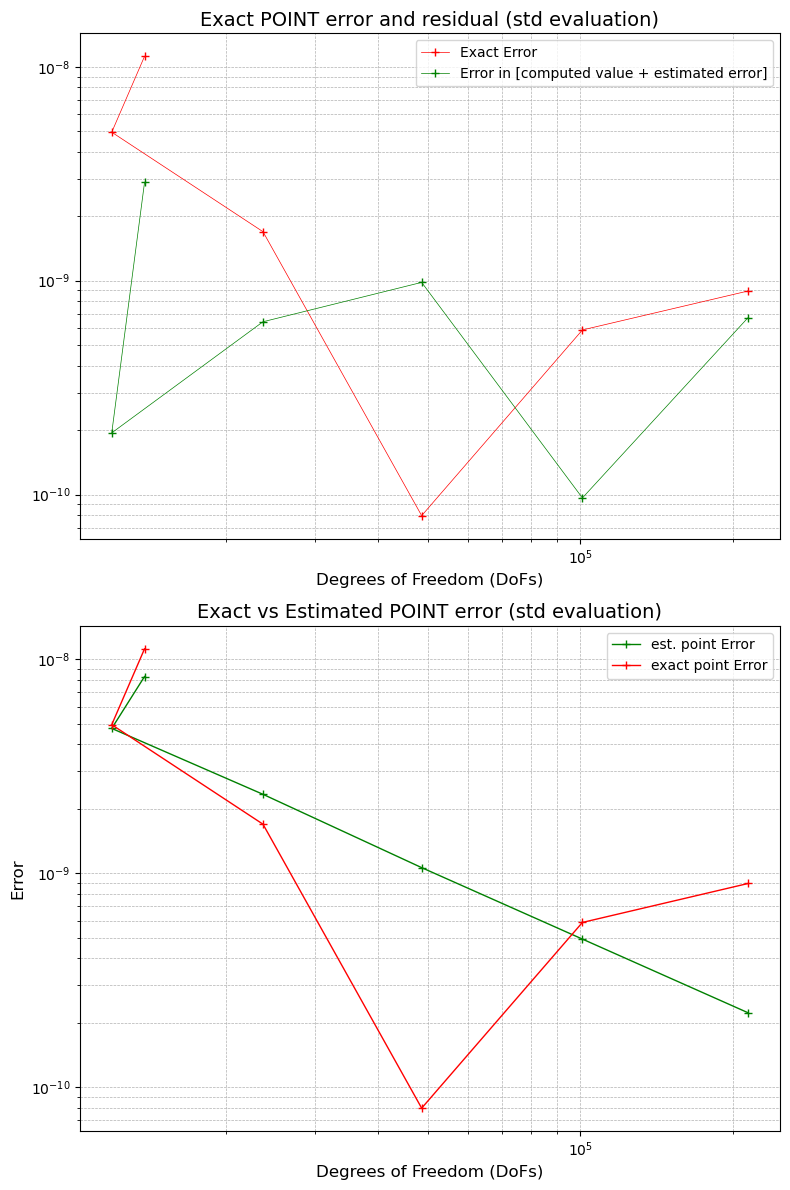

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


# Load the data from the CSV file
file_name = "./results/convergence_results.csv"
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
#data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('Exact POINT error and residual (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='est. point Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='exact point Error')


plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Exact vs Estimated POINT error (std evaluation)', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
